# Iterative Methods - Jacobi and Gau$\beta$-Siedel

In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../Py/Build')
from suite import *

A = spmat(3,3)
A[1,1]=3;    A[1,2]=1;    A[1,3]=-1;
A[2,1]=0;    A[2,2]=-2;    A[2,3]=1;
A[3,1]=2;    A[3,2]=-2;    A[3,3]=5;
print("A\n",A)

A
 [0,(1,1)]->3.000000
[1,(1,2)]->1.000000
[2,(1,3)]->-1.000000
[3,(2,1)]->0.000000
[4,(2,2)]->-2.000000
[5,(2,3)]->1.000000
[6,(3,1)]->2.000000
[7,(3,2)]->-2.000000
[8,(3,3)]->5.000000



In [2]:
b = vec(3);
b.from_Array([2,0,10]);
print("b:",b)
x0 = vec(3);
x0.from_Array([0,0,0]);
print("x0:",x0)
x = vec(3);
x.from_Array([1,1,2]);
print("x:",x)

b: (2.000000,0.000000,10.000000)
x0: (0.000000,0.000000,0.000000)
x: (1.000000,1.000000,2.000000)


In [3]:
Jacobi(A,b,x0)

(1.000000,1.000000,2.000000)

In [4]:
A = spmat(3,3)
A[1,1]=3;    A[1,2]=1;    A[1,3]=-1;
A[2,1]=0;    A[2,2]=-2;    A[2,3]=1;
A[3,1]=2;    A[3,2]=-2;    A[3,3]=5;
b = vec(3);
b.from_Array([2,0,10]);
x0 = vec(3);
x0.from_Array([0,0,0]);

In [5]:
GauBSiedel(A,b,x0)

(1.000000,1.000000,2.000000)

In [37]:
A = spmat(6,6)
A[1,1]=4;  A[1,2]=-1; A[1,3]=0;  A[1,4]=-1; A[1,5]=0;  A[1,6]=0;
A[2,1]=-1; A[2,2]=4;  A[2,3]=-1; A[2,4]=0;  A[2,5]=-1; A[2,6]=0;
A[3,1]=0;  A[3,2]=-1; A[3,3]=4;  A[3,4]=0;  A[3,5]=0;  A[3,6]=-1;
A[4,1]=-1; A[4,2]=0;  A[4,3]=0;  A[4,4]=4;  A[4,5]=-1; A[4,6]=0;
A[5,1]=0;  A[5,2]=-1; A[5,3]=0;  A[5,4]=-1; A[5,5]=4;  A[5,6]=-1;
A[6,1]=0;  A[6,2]=0;  A[6,3]=-1; A[6,4]=0;  A[6,5]=-1; A[6,6]=4;
b = vec(6);
b.from_Array([1,0,0,0,0,0]);
x0 = vec(6);
x0.from_Array([0,0,0,0,0,0]);
x = vec(6);
x.from_Array([0.294824,0.093168,0.028157,0.086128,0.049689,0.019462]);

In [40]:
SOR(A,b,x0,1.4)

(0.294824,0.093168,0.028157,0.086128,0.049689,0.019462)

__Jacobi VS Gau$\beta$-Siedel__

In [ ]:
A = spmat(3,3)
A[1,1]=3;    A[1,2]=1;    A[1,3]=-1;
A[2,1]=0;    A[2,2]=-2;    A[2,3]=1;
A[3,1]=2;    A[3,2]=-2;    A[3,3]=5;
b = vec(3);
b.from_Array([2,0,10]);
x0 = vec(3);
x0.from_Array([0,0,0]);

In [6]:
JacobiErr = [];
for i in range(1,21):
    err = vec(3);
    err = Jacobi(A,b,x0,i)-x;
    JacobiErr = JacobiErr + [err.norm(2)];

In [7]:
GSErr = [];
for i in range(1,21):
    err = vec(3);
    err = GauBSiedel(A,b,x0,i)-x;
    GSErr = GSErr + [err.norm(2)];

Text(0.5,1,'Jacobi Method VS Gauss-Siedel Method')

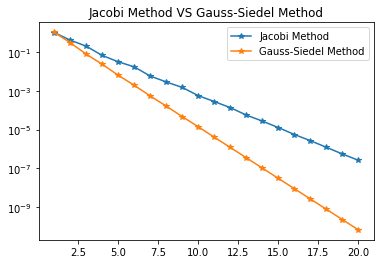

In [8]:
plt.semilogy(range(1,21),JacobiErr,"*-")
plt.semilogy(range(1,21),GSErr,"*-")
plt.legend(["Jacobi Method","Gauss-Siedel Method"])
plt.title("Jacobi Method VS Gauss-Siedel Method")

__Relaxation Parameters__

In [42]:
A = spmat(6,6)
A[1,1]=4;  A[1,2]=-1; A[1,3]=0;  A[1,4]=-1; A[1,5]=0;  A[1,6]=0;
A[2,1]=-1; A[2,2]=4;  A[2,3]=-1; A[2,4]=0;  A[2,5]=-1; A[2,6]=0;
A[3,1]=0;  A[3,2]=-1; A[3,3]=4;  A[3,4]=0;  A[3,5]=0;  A[3,6]=-1;
A[4,1]=-1; A[4,2]=0;  A[4,3]=0;  A[4,4]=4;  A[4,5]=-1; A[4,6]=0;
A[5,1]=0;  A[5,2]=-1; A[5,3]=0;  A[5,4]=-1; A[5,5]=4;  A[5,6]=-1;
A[6,1]=0;  A[6,2]=0;  A[6,3]=-1; A[6,4]=0;  A[6,5]=-1; A[6,6]=4;
b = vec(6);
b.from_Array([1,0,0,0,0,0]);
x0 = vec(6);
x0.from_Array([0,0,0,0,0,0]);
x = vec(6);
x.from_Array([0.294824,0.093168,0.028157,0.086128,0.049689,0.01942]);

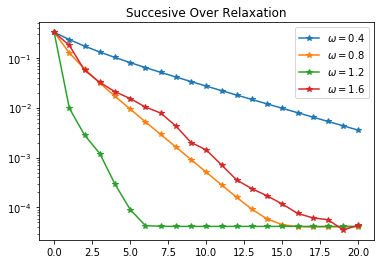

In [60]:
Err1 = [x.norm(2)];
Err2 = [x.norm(2)];
Err3 = [x.norm(2)];
Err4 = [x.norm(2)];
for i in range(1,21):
    err = vec(6);
    err = SOR(A,b,x0,0.4,i)-x;
    Err1 = Err1 + [err.norm(2)];
    err = SOR(A,b,x0,0.8,i)-x;
    Err2 = Err2 + [err.norm(2)];
    err = SOR(A,b,x0,1.2,i)-x;
    Err3 = Err3 + [err.norm(2)];
    err = SOR(A,b,x0,1.6,i)-x;
    Err4 = Err4 + [err.norm(2)];
plt.semilogy(range(21),Err1,"*-")
plt.semilogy(range(21),Err2,"*-")
plt.semilogy(range(21),Err3,"*-")
plt.semilogy(range(21),Err4,"*-")
plt.legend(["$\omega=0.4$","$\omega=0.8$","$\omega=1.2$","$\omega=1.6$"])
plt.title("Succesive Over Relaxation");